## STEP 1: Data Understanding: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# information about dataset
# reading dataset
# dataset = pd.read_csv('updated_ttg_dataset.csv')
dataset = pd.read_csv('updated_ttg_dataset_v2.csv')
# Delete TTG column
dataset = dataset.drop(columns=['LBXTTG'])
# Delete EMA column
dataset = dataset.drop(columns=['LBXEMA'])

### Data Description:


- Data Type and Structure

In [48]:
dataset.head()

,SEQN,LBXTTG,LBXEMA,LBXFER,LBXCRP,LBXTFR,LBXTR,LBDLDL,LBXVIDMS,LBXVD2MS,...,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBDLYMNO,LBXHGB,LBXHCT,LBXMCVSI,LBXRDW,LBXPLTSI,Class
0,51624.0,2.0,NaN,NaN,0.16,NaN,NaN,NaN,75.7,1.45,...,9.3,51.4,0.8,2.3,14.7,44.1,89.3,12.1,266.0,2.0
1,51626.0,2.0,NaN,NaN,0.09,NaN,NaN,NaN,32.8,2.07,...,11.0,46.1,2.2,1.8,14.1,41.7,91.9,12.5,242.0,2.0
2,51627.0,2.0,NaN,NaN,0.09,NaN,NaN,NaN,45.1,1.45,...,6.3,38.3,3.3,2.6,12.7,37.4,84.8,12.3,368.0,2.0
3,51628.0,2.0,NaN,NaN,2.34,NaN,NaN,NaN,49.2,6.33,...,4.8,71.3,2.5,1.7,13.7,41.6,84.6,15.1,175.0,2.0
4,51629.0,2.0,NaN,NaN,0.44,NaN,NaN,NaN,67.2,1.45,...,5.9,60.5,1.9,2.4,15.1,44.3,82.6,12.5,290.0,2.0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8591 entries, 0 to 8590
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8591 non-null   float64
 1   LBXTTG    7798 non-null   float64
 2   LBXEMA    49 non-null     float64
 3   LBXFER    2131 non-null   float64
 4   LBXCRP    7892 non-null   float64
 5   LBXTFR    2131 non-null   float64
 6   LBXTR     3357 non-null   float64
 7   LBDLDL    3308 non-null   float64
 8   LBXVIDMS  7898 non-null   float64
 9   LBXVD2MS  7898 non-null   float64
 10  LBDRBF    7932 non-null   float64
 11  LBDFOL    7897 non-null   float64
 12  LBXSAL    6860 non-null   float64
 13  LBXSCA    6860 non-null   float64
 14  LBXSIR    6856 non-null   float64
 15  LBXSTP    6847 non-null   float64
 16  LBXSCH_x  6860 non-null   float64
 17  LBXSCH_y  6860 non-null   float64
 18  LBXSBU    6860 non-null   float64
 19  LBXSGTSI  6859 non-null   float64
 20  LBXSPH    6856 non-null   floa

- **Dataset contain 36 variables,** all features is numberical.
- **Categorical Columns are:** 
- **Numerical Columns:** 

## STEP 2: Exploratory Data Analyist EDA

### Uniqe Value

- Check unique value for each variable.
- NOTE: Target class need to adjust its value to be numerical without decemal.

In [ ]:
# Checking for unique values
#dataset['column_name'].unique()

# identify unique value for each column
for column in dataset.columns:
    print(column, dataset[column].unique())

### Feature Distribution

- Check feature distribution

In [25]:
dataset.describe()

,SEQN,LBXFER,LBXCRP,LBXTFR,LBXTR,LBDLDL,LBXVIDMS,LBXVD2MS,LBDRBF,LBDFOL,...,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBDLYMNO,LBXHGB,LBXHCT,LBXMCVSI,LBXRDW,LBXPLTSI,Class
count,8591.000000,2131.000000,7892.000000,2131.000000,3357.000000,3308.000000,7898.000000,7898.000000,7932.000000,7897.000000,...,7935.000000,7935.000000,7.935000e+03,7935.000000,7945.000000,7945.000000,7945.000000,7945.000000,7945.000000,7786.000000
mean,56879.205797,52.812764,0.346035,3.399812,123.277033,110.888150,63.100409,2.951630,482.651311,19.436178,...,7.868885,56.508066,3.005747e+00,2.217076,13.954550,40.716702,88.450321,12.829566,248.494147,1.996789
std,3049.887901,61.207844,0.708903,2.245787,105.995955,35.061942,24.763887,8.361234,213.843773,12.484221,...,2.373983,10.262307,2.324158e+00,0.782545,1.431622,4.175538,5.815969,1.232105,66.314397,0.068865
min,51624.000000,2.000000,0.010000,0.900000,18.000000,13.000000,7.430000,1.450000,87.400000,1.900000,...,0.800000,9.000000,5.397605e-79,0.400000,6.100000,20.500000,57.500000,9.700000,11.000000,1.000000
25%,54235.500000,20.000000,0.050000,2.400000,70.000000,85.000000,45.600000,1.450000,342.500000,11.300000,...,6.300000,50.200000,1.600000e+00,1.700000,13.000000,37.800000,85.200000,12.100000,204.000000,2.000000
50%,56882.000000,37.000000,0.140000,2.900000,100.000000,107.000000,61.200000,1.450000,441.100000,16.900000,...,7.700000,57.000000,2.400000e+00,2.100000,13.900000,40.500000,88.800000,12.500000,241.000000,2.000000
75%,59517.500000,65.000000,0.360000,3.700000,147.000000,132.000000,77.500000,1.450000,569.500000,24.500000,...,9.200000,63.500000,3.800000e+00,2.600000,15.000000,43.800000,92.100000,13.200000,286.000000,2.000000
max,62160.000000,1090.000000,18.010000,54.500000,2742.000000,266.000000,262.000000,175.000000,3125.800000,253.900000,...,40.400000,93.600000,3.410000e+01,20.100000,19.500000,55.800000,116.500000,31.800000,1000.000000,3.000000


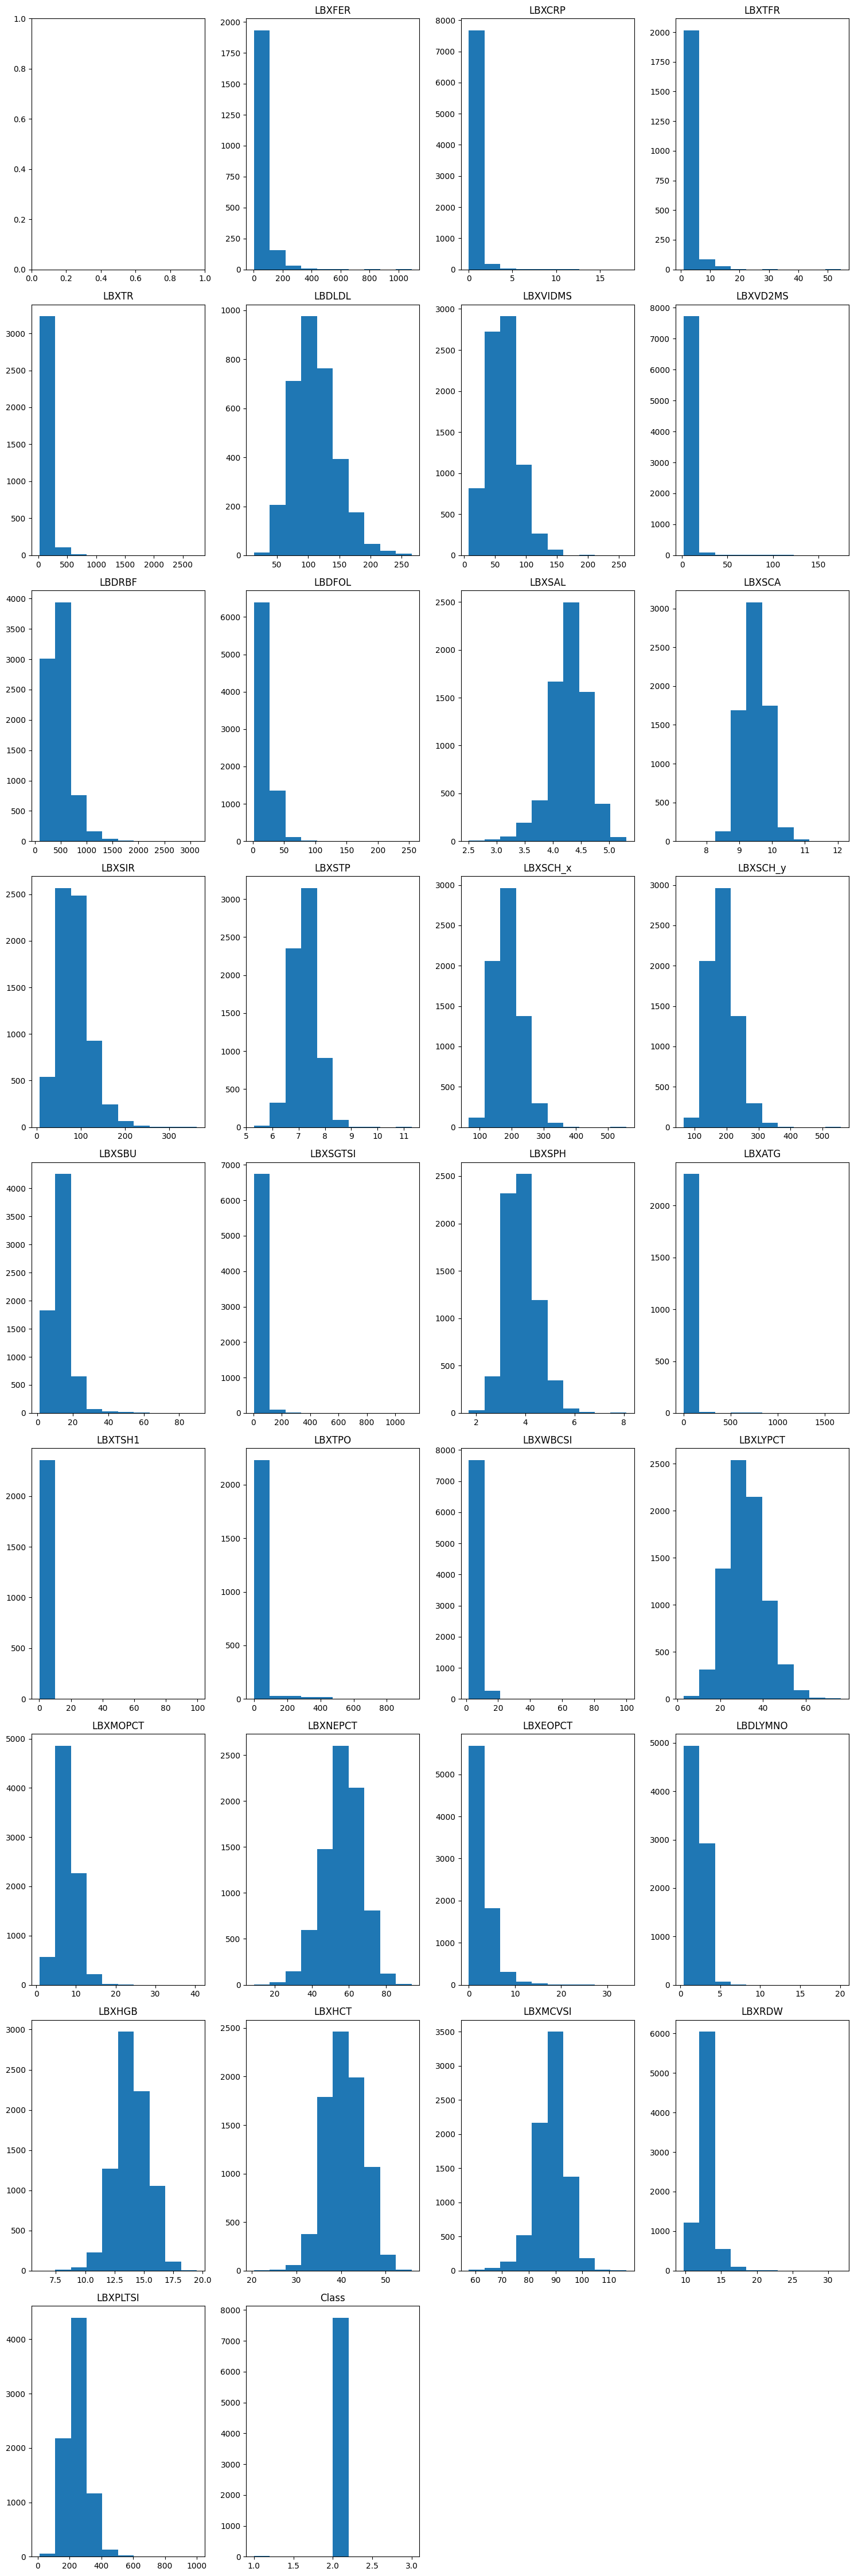

In [26]:
# Checking for data distribution
# Checking for skewness

# Plot histogram for each column, 3 features per row
num_columns = 4
num_rows = (len(dataset.columns) - 1) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(dataset.columns):
    if column != 'SEQN':
        axes[i].hist(dataset[column])
        axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#dataset.skew()



- Check Target feature (class) distribution

Class(1) : 31
Class(2) : 7749
Class(3) : 6


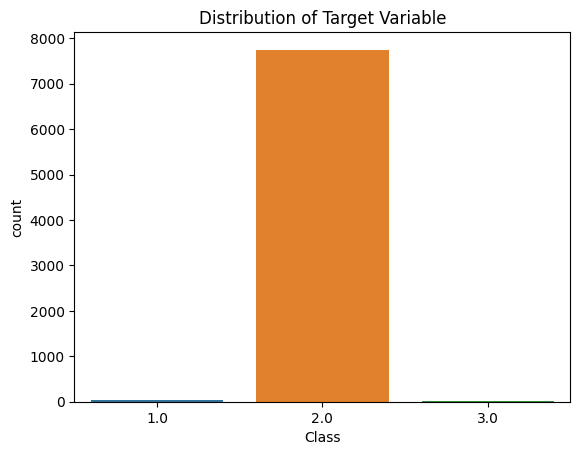

In [4]:
for c in np.unique(dataset['Class']):
    if c is not None and not np.isnan(c):
        print('Class(%d) : %d' % (c, sum(dataset['Class']==c)))

# Plot the distribution of the target variable
sns.countplot(x='Class', data=dataset)
plt.title('Distribution of Target Variable')
plt.show()

### Duplication

In [28]:
# Checking for duplicates
doublicated = dataset.duplicated().sum()
if doublicated > 0:
    print('There are %d duplicates' % doublicated)
else:
    print('There are no duplicates')


There are no duplicates


- No douplication founded in dataset.

### Missing Value:

- Check missing value for each variable.

In [1]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Columns': missing_values.index,
    'Missing Values': missing_values.values
})

# Plot the missing values
plt.figure(figsize=(18, 15))
barplot = sns.barplot(x='Columns', y='Missing Values', data=missing_df)
plt.title('Distribution of Missing Values Across Features')
# Annotate each bar with the count of missing values
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9), textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

NameError: name 'dataset' is not defined

- As the information above, found missing data into 12 features **LBXTTG, LBXEMA, LBXFER, LBXCRP, LBXTFR, LBXTR, LBDLDL, LBXVIDMS, LBXVD2MS, LBDRBF, LBDFOL**

### 6. Correlation: 

- Check Univariate correlation.


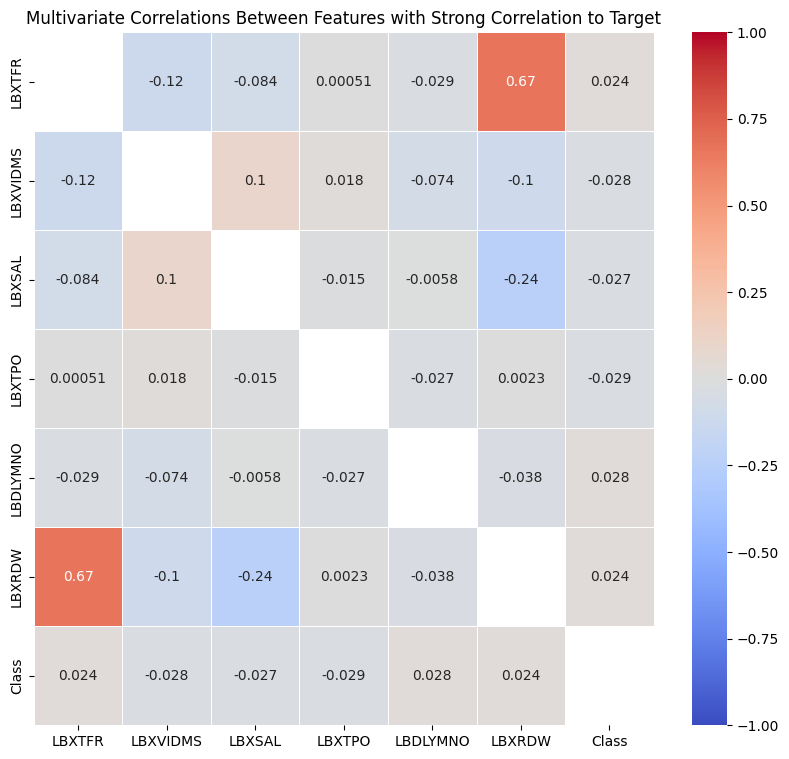

In [7]:
threshold = 0.02
target = 'Class'  # Replace with your target variable name

# Check for correlation
correlation = dataset.corr()

# Filter the correlation matrix to only include strong correlations with the target
strong_corr_features = correlation.index[correlation[target].abs() >= threshold].tolist()

# Filter the correlation matrix to only include these features
correlation_ = correlation.loc[strong_corr_features, strong_corr_features]

# Remove self-correlations
correlation_ = correlation_.where(~np.eye(correlation_.shape[0], dtype=bool))

# Plot the heatmap for the strong correlations
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Multivariate Correlations Between Features with Strong Correlation to Target')
plt.show()

- Check Multivariate correlation.

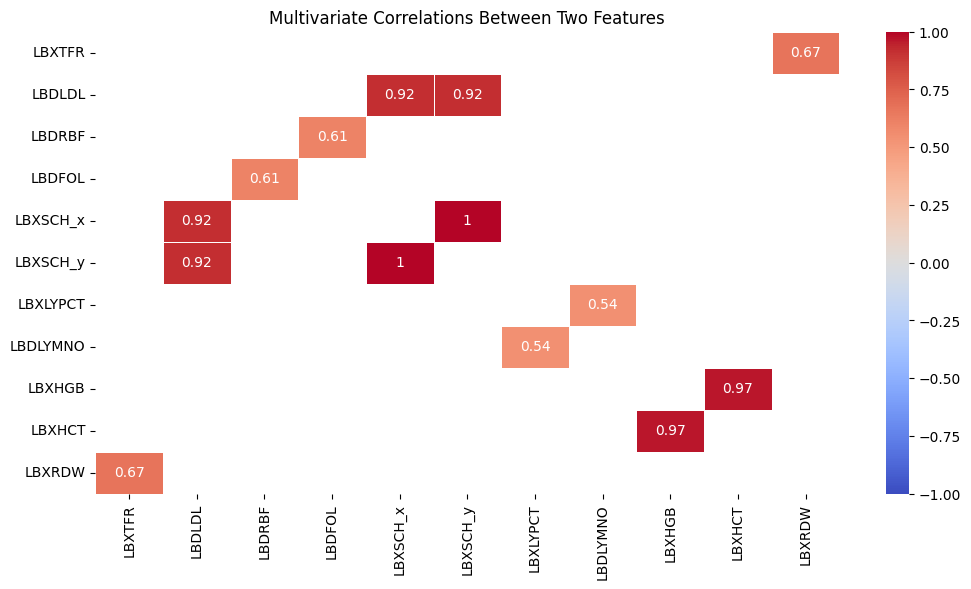

In [11]:
correlation = dataset.corr()
# plot the correlation between features
threshold = 0.5

# Filter the correlation matrix to only include strong correlations
strong_corr = correlation[(correlation >= threshold)]
strong_corr = strong_corr.where(~np.eye(strong_corr.shape[0], dtype=bool))

# Drop rows and columns that are all NaN (no strong correlations)
strong_corr = strong_corr.dropna(how='all').dropna(axis=1, how='all')

# Plot the heatmap for the strong correlations
plt.figure(figsize=(12, 6))
sns.heatmap(strong_corr, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Multivariate Correlations Between Two Features')
plt.show()

## STEP 3: Modeling & Data Preparation: 

### Splitting Dataset:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Impute Missing: 

In [3]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with the desired strategy (e.g., mean, median, most_frequent)
feature_imputer = SimpleImputer(strategy='mean')
target_imputer = SimpleImputer(strategy='most_frequent')

X_train = pd.DataFrame(feature_imputer.fit_transform(X_train), columns=X_train.columns)
y_train = pd.Series(target_imputer.fit_transform(y_train.values.reshape(-1, 1)).flatten())

#X_val = pd.DataFrame(feature_imputer.transform(X_val), columns=X_train.columns)
#y_val = pd.Series(target_imputer.transform(y_val.values.reshape(-1, 1)).flatten())
#print(X_val.isnull().sum())

In [4]:
# Check for missing values after imputation
print('Cont of null value in Target: ',y_train.isnull().sum())
print('Cont of null value in all Features: ',X_train.isnull().sum().sum())

Cont of null value in Target:  0
Cont of null value in all Features:  0


### Imbalance Class:

- This function used for ploting to check distribution of each class in dataset

In [62]:
def plot_data_boundary(X, y, title="", clf=None, save_to_file=""):
    fig, ax = plt.subplots()
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]

    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    if (clf):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    n_classes = len(np.unique(y))
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)[0]
        ax.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value),
                    cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    if title != "":
        ax.set_title(title)
    ax.legend()
    
    if save_to_file != "":
        fig = plt.gcf()
        fig.savefig(save_to_file, bbox_inches='tight'); 

- Impute class imbalance with `STOME`

In [5]:
from imblearn.over_sampling import SMOTE

# Ensure y_train is categorical
if np.issubdtype(y_train.dtype, np.number):
    y_train = y_train.astype(int)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

#plot_data_boundary(X_train, y_train, save_to_file="data_smote.pdf")

Class(1) : 6839
Class(2) : 6839
Class(3) : 6839
total data after SMOTE : 20517


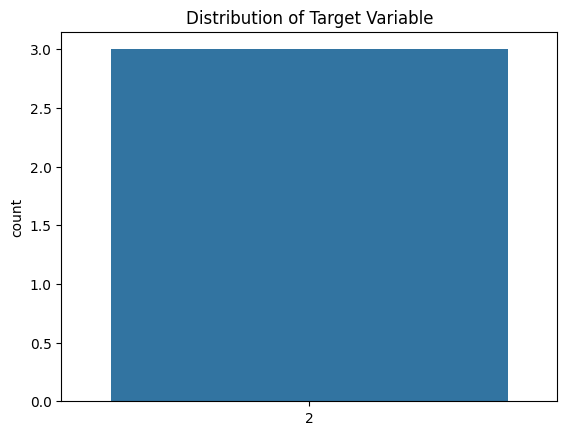

In [20]:
for c in np.unique(y_train):
    if c is not None and not np.isnan(c):
        print('Class(%d) : %d' % (c, sum(y_train==c)))

print('total data after SMOTE : %d' % len(y_train))

# Plot the distribution of the target variable
sns.countplot(x=y_train.unique(), data=y_train)
plt.title('Distribution of Target Variable')
plt.show()

### Select and Evaluate Model:

- Compare accuracy of model before applying `SMOTE` and after 

Baseline Model Score :  0.338
Improved Model Score :  0.38


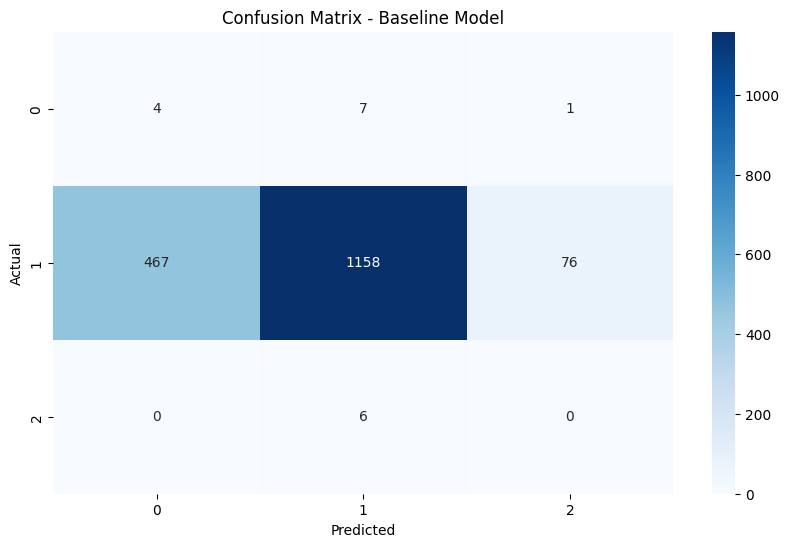

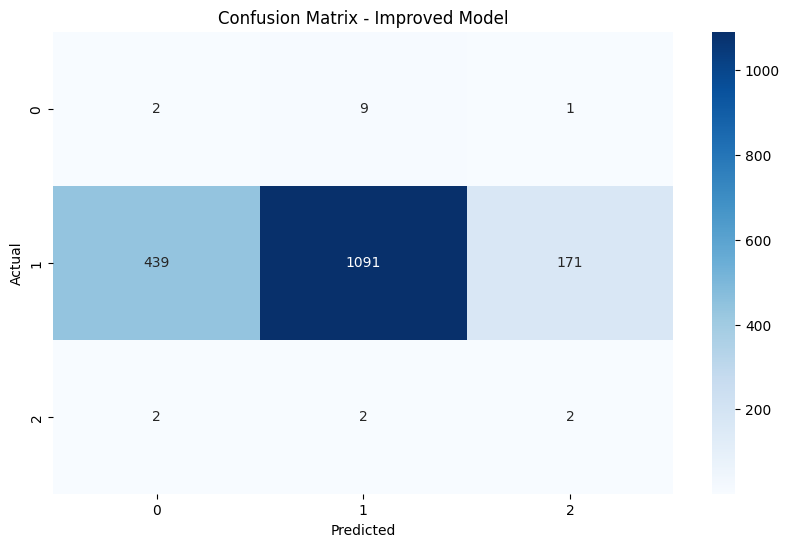

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_recall_curve, average_precision_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

def test_model(model):
    # Handle NaN values in y_val with imputation
    y_val_filled = y_val.copy()
    if np.isnan(y_val_filled).any():
        missing_indices = y_val_filled.index[y_val_filled.isna()]   # Get the missing indices
        model.fit(X_train, y_train)  # Train the model on the entire training set
        predictions = model.predict(X_val.loc[missing_indices])  # Predict on the rows with missing target values
        y_val_filled.loc[missing_indices] = predictions   # Assign the predictions to the corresponding missing indices
    # Test on tesing set 
    model.fit(X_train, y_train)  # Train on the entire training set
    y_test_pred = model.predict(X_val)
    acc = recall_score(y_val_filled, y_test_pred, average='macro')
    return acc, y_val_filled, y_test_pred


k_folds = RepeatedKFold(n_splits=5, random_state=42, n_repeats=2)

# using pipeline to scale the data and then apply the model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
pipline_baseline_model = Pipeline([("imputer", SimpleImputer(strategy='mean')), ("scaler", StandardScaler()), ("classifier", baseline_model)])
model_base_scores = cross_val_score(pipline_baseline_model, X_train, y_train, scoring='recall_macro', cv=k_folds)

# Improved Model
model_improved = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=3, min_samples_split=2)
pipline_model_improved = Pipeline([(("imputer", SimpleImputer(strategy='mean'))), ("scaler", StandardScaler()), ("classifier", model_improved)])
model_improved_scores = cross_val_score(pipline_model_improved, X_train, y_train, scoring='recall_macro', cv=k_folds)

# Evaluate the Models
baseline_eval, y_val_clean, baseline_preds = test_model(pipline_baseline_model)
print('Baseline Model Score : ', round(baseline_eval,3))
improved_eval, y_val_clean, improved_preds = test_model(pipline_model_improved)
print('Improved Model Score : ', round(improved_eval,3))

# Calculate confusion matrix for each model
conf_matrix_baseline = confusion_matrix(y_val_clean, baseline_preds)
conf_matrix_improved = confusion_matrix(y_val_clean, improved_preds)

# Plot confusion matrix for baseline model
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_baseline, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for improved model
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_improved, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Improved Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#print('Baseline Model Score : ', round(model_base_scores.mean(),3))
#print('Improved Model Score : ', round(model_improved_scores.mean(),3))
#print(round(model_base_scores.mean(),3))
#print(round(model_smote_scores.mean(),3))


### Feature Importance:

Top 11 features:
     Feature        Score  Selected
32  LBXPLTSI  4774.085986      True
6   LBXVIDMS  3657.531627      True
31    LBXRDW  3638.183452      True
27  LBDLYMNO  3464.810177      True
23  LBXLYPCT  2871.251364      True
16    LBXSBU  1874.377561      True
26  LBXEOPCT  1868.006311      True
22  LBXWBCSI  1705.580052      True
18    LBXSPH  1565.691182      True
17  LBXSGTSI  1536.160839      True
3     LBXTFR  1401.126050      True

Selected features:
     Feature        Score  Selected
32  LBXPLTSI  4774.085986      True
6   LBXVIDMS  3657.531627      True
31    LBXRDW  3638.183452      True
27  LBDLYMNO  3464.810177      True
23  LBXLYPCT  2871.251364      True
16    LBXSBU  1874.377561      True
26  LBXEOPCT  1868.006311      True
22  LBXWBCSI  1705.580052      True
18    LBXSPH  1565.691182      True
17  LBXSGTSI  1536.160839      True
3     LBXTFR  1401.126050      True


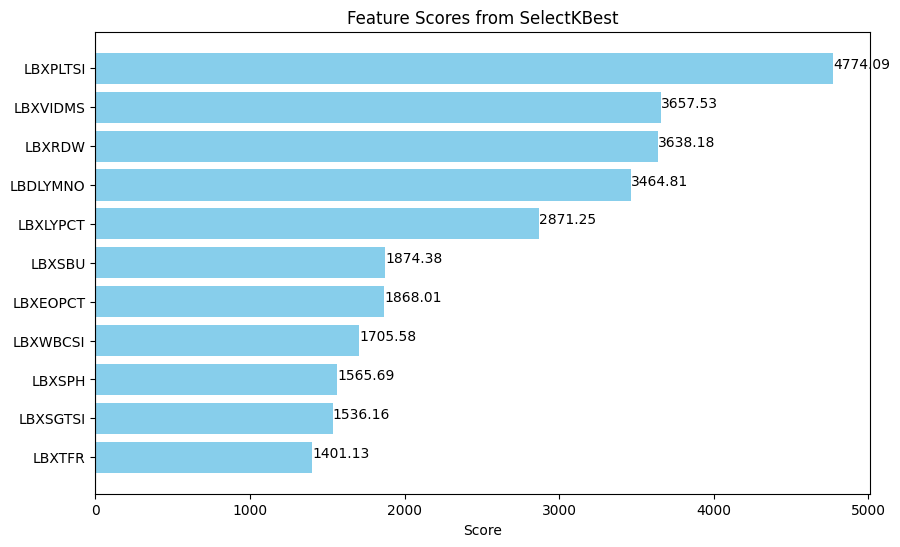

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to select the top K features
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train, y_train)

# Get the selected features and their scores
selected_features = selector.get_support(indices=True)
scores = selector.scores_

# Create a DataFrame to show feature names and their scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores['Selected'] = feature_scores.index.isin(selected_features)

# Sort the feature scores by 'Score' in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).head(11)
print("Top 11 features:")
print(feature_scores.head(30))
print("\nSelected features:")
print(feature_scores.head(k))

# Plotting the feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Score')
plt.title('Feature Scores from SelectKBest')
plt.axvline(x=0, color='grey', linewidth=0.8)  # Add a vertical line at x=0
for index, value in enumerate(feature_scores['Score']):
    plt.text(value, index, f'{value:.2f}')  # Annotate the score values

# Invert the y-axis to show the highest scores at the top
plt.gca().invert_yaxis()
plt.show()

- Evaluate Baseline and Improved model after feature selection:

    - The Best Feature Selected for Baseline Modle is: 11. 
    - And Best Feature Selection for Improved Model is: 9.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


# Best number of Feature Selection for Baseline model is 11
pipeline_model_baseline = Pipeline([
            ("imputer", SimpleImputer(strategy='mean')),           # Impute missing values
            ("selector", SelectKBest(f_classif, k=11)),            # Feature selection
            ("scaler", StandardScaler()),                          # Standardization
            ("forest_model", baseline_model)])
model_baseline_scores = cross_val_score(pipeline_model_baseline, X_train, y_train, scoring='recall_macro', cv=k_folds)
print('The Recall of Baseline model with Feature Selection: ', round(model_baseline_scores.mean(),3))


pipeline_model_improved = Pipeline([
            ("imputer", SimpleImputer(strategy='mean')),           # Impute missing values
            ("selector", SelectKBest(f_classif, k=13)),            # Feature selection
            ("scaler", StandardScaler()),                          # Standardization
            ("forest_model", model_improved)])
model_improved_scores = cross_val_score(pipeline_model_improved, X_train, y_train, scoring='recall_macro', cv=k_folds)
print('The Recall sof improved model with feature selection: ', round(model_improved_scores.mean(),3))
#print(round(model_smote_scores.mean(),3), round(model_smote_scores.std(),3))


# TESING MODEL ON TESTING SET  ----------------------------------------------------
#def test_model(model):
    # Handle NaN values in y_val with imputation
#    y_val_filled = y_val.copy()
#    if np.isnan(y_val_filled).any():
#        missing_indices = y_val_filled.index[y_val_filled.isna()]   # Get the missing indices
#        model.fit(X_train, y_train)  # Train the model on the entire training set
#        predictions = model.predict(X_val.loc[missing_indices])  # Predict on the rows with missing target values
#        y_val_filled.loc[missing_indices] = predictions   # Assign the predictions to the corresponding missing indices
    # Test on tesing set 
#    model.fit(X_train, y_train)  # Train on the entire training set
#    y_test_pred = model.predict(X_val)
#    acc = recall_score(y_val_filled, y_test_pred, average='macro')
#    return acc


#test_baseline_model = test_model(pipeline_model_baseline)
#print('The Recall of Baseline model on Testing set: ', round(test_baseline_model,3))
#test_imroved_model = test_model(pipeline_model_smote)
#print('The Recall of Improved model on Testing set: ', round(test_imroved_model,3))

### Hyperparameter Tunning: 
- Apply Hyperparameter tunning on Improved model to obtain best parameter for:
    - Model parameter, which are 
    - Feature Selection number

In [34]:
from sklearn.metrics import recall_score
import optuna

def objective(trial):
    # Suggest hyperparameters for logistic regression
    #c = trial.suggest_loguniform('C', 1e-10, 1e10)
    max_iter = trial.suggest_int('max_iter', 100, 200)
    k_sf = trial.suggest_int('k_sf', 1, 30)
    

    # Create and train the model
    model = LogisticRegression(
        # Suggest hyperparameters
        #C=c,
        max_iter=max_iter,
        random_state=42
    )
    
    pipline_model = Pipeline([
            ("imputer", SimpleImputer(strategy='mean')),
            ("selector", SelectKBest(f_classif, k=k_sf)),
            ("scaler", StandardScaler()), 
            ("forest_model", model)])
    
    # Define cross-validation strategy
    cv = RepeatedKFold(n_splits=5, random_state=42, n_repeats=2)

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(pipline_model, X_train, y_train, cv=cv, scoring='recall_macro')

    # Train the model on the entire training set
    pipline_model.fit(X_train, y_train)

    #y_val_filled = y_val.copy()
    if np.isnan(y_val).any():
        missing_indices = y_val.index[y_val.isna()]   # Get the missing indices
        #pipline_model_baseline.fit(X_train, y_train)  # Train the model on the entire training set
        predictions = pipline_model.predict(X_val.loc[missing_indices])  # Predict on the rows with missing target values
        y_val.loc[missing_indices] = predictions   # Assign the predictions to the corresponding missing indice
    
    # After managing missing on target, Evaluate the model on the validation set
    y_pred = pipline_model.predict(X_val)

    val_accuracy = recall_score(y_val, y_pred, average='macro')

    #return round(cv_scores.mean(),4) 
    return round(val_accuracy,3)

# Create a study and optimize the objective function
baseline_tunning = optuna.create_study(direction='maximize')
baseline_tunning.optimize(objective, n_trials=10)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters for Baseline model: ", baseline_tunning.best_params)
print("Best accuracy for Baseline model ", baseline_tunning.best_value)
        

[I 2024-10-20 22:53:45,898] A new study created in memory with name: no-name-bc6efb99-2202-410d-b8e9-150974f26952
[I 2024-10-20 22:53:48,676] Trial 0 finished with value: 0.352 and parameters: {'max_iter': 108, 'k_sf': 20}. Best is trial 0 with value: 0.352.
[I 2024-10-20 22:53:54,310] Trial 1 finished with value: 0.357 and parameters: {'max_iter': 125, 'k_sf': 25}. Best is trial 1 with value: 0.357.
[I 2024-10-20 22:53:59,163] Trial 2 finished with value: 0.331 and parameters: {'max_iter': 111, 'k_sf': 22}. Best is trial 1 with value: 0.357.
[I 2024-10-20 22:54:00,854] Trial 3 finished with value: 0.457 and parameters: {'max_iter': 100, 'k_sf': 12}. Best is trial 3 with value: 0.457.
[I 2024-10-20 22:54:02,006] Trial 4 finished with value: 0.528 and parameters: {'max_iter': 164, 'k_sf': 8}. Best is trial 4 with value: 0.528.
[I 2024-10-20 22:54:03,629] Trial 5 finished with value: 0.457 and parameters: {'max_iter': 196, 'k_sf': 12}. Best is trial 4 with value: 0.528.
[I 2024-10-20 22:

Best hyperparameters for Baseline model:  {'max_iter': 164, 'k_sf': 8}
Best accuracy for Baseline model  0.528


In [37]:
from sklearn.metrics import recall_score
import optuna

def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 50)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    k_sf = trial.suggest_int('k_sf', 1, 30)

    # Create and train the model
    model = RandomForestClassifier(
        # Suggest hyperparameters
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    pipline_model = Pipeline([
            ("imputer", SimpleImputer(strategy='mean')),
            ("selector", SelectKBest(f_classif, k=k_sf)),
            ("scaler", StandardScaler()), 
            ("forest_model", model)])
    
    # Define cross-validation strategy
    cv = RepeatedKFold(n_splits=5, random_state=42, n_repeats=2)

    # Perform cross-validation on the training set
    cv_scores = cross_val_score(pipline_model, X_train, y_train, cv=cv, scoring='recall_macro')

    # Train the model on the entire training set
    pipline_model.fit(X_train, y_train)

    #y_val_filled = y_val.copy()
    if np.isnan(y_val).any():
        missing_indices = y_val.index[y_val.isna()]   # Get the missing indices
        #pipline_model_baseline.fit(X_train, y_train)  # Train the model on the entire training set
        predictions = pipline_model.predict(X_val.loc[missing_indices])  # Predict on the rows with missing target values
        y_val.loc[missing_indices] = predictions   # Assign the predictions to the corresponding missing indice
    
    # After managing missing on target, Evaluate the model on the validation set
    y_pred = pipline_model.predict(X_val)

    val_accuracy = recall_score(y_val, y_pred, average='macro')

    #return round(cv_scores.mean(),4) 
    return round(val_accuracy,3)

# Create a study and optimize the objective function
improved_tunning = optuna.create_study(direction='maximize')
improved_tunning.optimize(objective, n_trials=10)

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters for Improved model: ", improved_tunning.best_params)
print("Best accuracy for Improved model ", improved_tunning.best_value)
        

[I 2024-10-20 23:02:01,928] A new study created in memory with name: no-name-fa8a90eb-9bb5-4d0b-b28a-e5d67ffde1a3
[I 2024-10-20 23:02:06,408] Trial 0 finished with value: 0.311 and parameters: {'n_estimators': 12, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 5, 'k_sf': 15}. Best is trial 0 with value: 0.311.
[I 2024-10-20 23:02:15,872] Trial 1 finished with value: 0.555 and parameters: {'n_estimators': 29, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 16, 'k_sf': 5}. Best is trial 1 with value: 0.555.
[I 2024-10-20 23:02:24,222] Trial 2 finished with value: 0.605 and parameters: {'n_estimators': 42, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 5, 'k_sf': 4}. Best is trial 2 with value: 0.605.
[I 2024-10-20 23:02:28,320] Trial 3 finished with value: 0.387 and parameters: {'n_estimators': 44, 'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 2, 'k_sf': 11}. Best is trial 2 with value: 0.605.
[I 2024-10-20 23:02:38,236] Trial 4 finis

Best hyperparameters for Improved model:  {'n_estimators': 42, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 5, 'k_sf': 4}
Best accuracy for Improved model  0.605


### Testing:

- Compare the accuracy of the model once without 

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# TESING MODEL ON TESTING SET  ----------------------------------------------------
def test_model(model):
    # Handle NaN values in y_val with imputation
    y_val_filled = y_val.copy()
    if np.isnan(y_val_filled).any():
        missing_indices = y_val_filled.index[y_val_filled.isna()]   # Get the missing indices
        model.fit(X_train, y_train)  # Train the model on the entire training set
        predictions = model.predict(X_val.loc[missing_indices])  # Predict on the rows with missing target values
        y_val_filled.loc[missing_indices] = predictions   # Assign the predictions to the corresponding missing indices
    # Test on tesing set 
    model.fit(X_train, y_train)  # Train on the entire training set
    y_test_pred = model.predict(X_val)
    acc = recall_score(y_val_filled, y_test_pred, average='macro')
    return acc

# TEST  BASELINE MODEL WITHOUT TUNNING ON TESTING SET  ----------------------------------------------------
# Create an instance of the LogisticRegression model with the best hyperparameters
model_baseline = LogisticRegression(random_state=42, max_iter=baseline_tunning.best_params['max_iter'])

pipeline_model_baseline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ("selector", SelectKBest(f_classif, k=baseline_tunning.best_params['k_sf'])),
    ("scaler", StandardScaler()), 
    ("classifier", model_baseline)
])


# TEST IMPROVED MODEL WITH TUNNING ON TESTING SET  ----------------------------------------------------
# Create a RandomForestClassifier model with the best hyperparameters
model_improved = RandomForestClassifier(
    n_estimators=improved_tunning.best_params['n_estimators'],
    max_depth=improved_tunning.best_params['max_depth'],
    min_samples_split=improved_tunning.best_params['min_samples_split'],
    min_samples_leaf=improved_tunning.best_params['min_samples_leaf'],
    random_state=42
)

pipeline_model_improved = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ("selector", SelectKBest(f_classif, k=improved_tunning.best_params['k_sf'])),
    ("scaler", StandardScaler()), 
    ("forest_model", model_improved)
])

# Uncomment the following lines if you want to perform cross-validation
# model_smote_scores = -cross_val_score(pipeline_model_smote, X_train_balanced, y_train_balanced, scoring='neg_root_mean_squared_error', cv=k_folds)
# print(model_smote_scores.mean(), model_smote_scores.std())

# Test Baseline Model
test_baseline = test_model(pipeline_model_baseline)
print('The Recall of Baseline model on Testing set after tunning: ', round(test_baseline,3))

# Test Improved Model 
test_with_tunning =  test_model(pipeline_model_improved)
print('The Recall of Improved model on Testing set after tunning: ', round(test_with_tunning,3))

The Recall of Baseline model on Testing set with tunning:  0.528
The Recall of Improved model on Testing set with tunning:  0.605
